In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print("your uploaded file {name} with length of file{len}".format(name=fn,len=len(uploaded[fn])))

Saving winequality.names to winequality (1).names
Saving winequality-red.csv to winequality-red (1).csv
Saving winequality-white.csv to winequality-white (1).csv
your uploaded file winequality.names with length of file3305
your uploaded file winequality-red.csv with length of file84199
your uploaded file winequality-white.csv with length of file264426


# Certain fuction for code reusability

In [98]:
# Evaluation metric for model
# mean squared error , r2-score and accuracy are used for metrics for performance of model 
def performance_checker(model,features,true_label):
  df=pd.DataFrame(model.predict(features),columns=['predicted'])
  df['actual']=true_label.values
  df['predicted_approx']=df['predicted'].apply(lambda x:int(x) if (2*x)<(2*int(x)+1) else int(x)+1)
  print("Mean squared error : {}".format(mean_squared_error(df['predicted'],df['actual'])))
  print("r2_score : {}".format(r2_score(df['actual'],df['predicted'])))
  print("Accuracy : {}".format(accuracy_score(df['predicted_approx'],df['actual'])))
  print(df.head(10))

# visualization for features
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()  
    plt.show()
def draw_boxplot(dataframe, features, seperate, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe.boxplot(by=seperate,ax=ax,column=feature,grid=False)
        ax.set_title(feature+" Distribution",color='DarkRed')
    fig.tight_layout()  
    plt.show()


# Data Visualization

In [99]:
redWine_df=pd.read_csv('winequality-red.csv',sep=";")
whiteWine_df=pd.read_csv('winequality-white.csv',sep=";")

In [100]:
whiteWine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [101]:
redWine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [102]:
whiteWine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [103]:
redWine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All data types are float

# storing 10% of dataset for testing purpose at end

In [185]:
from sklearn.model_selection import  train_test_split

In [105]:
red_data,red_test=train_test_split(redWine_df,test_size=0.1,random_state=0)
white_data,white_test=train_test_split(whiteWine_df,test_size=0.1,random_state=0)

In [106]:
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2584,6.8,0.18,0.30,12.8,0.062,19.0,171.0,0.99808,3.00,0.52,9.0,7
3156,6.1,0.17,0.42,15.1,0.033,28.0,124.0,0.99684,2.87,0.47,9.5,5
891,5.8,0.26,0.18,1.2,0.031,40.0,114.0,0.99080,3.42,0.40,11.0,7
3534,7.2,0.31,0.35,7.2,0.046,45.0,178.0,0.99550,3.14,0.53,9.7,5
117,7.0,0.14,0.40,1.7,0.035,16.0,85.0,0.99110,3.19,0.42,11.8,6


In [107]:
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
148,6.9,0.49,0.10,2.3,0.074,12.0,30.0,0.99590,3.42,0.58,10.2,6
570,11.5,0.35,0.49,3.3,0.070,10.0,37.0,1.00030,3.32,0.91,11.0,6
737,8.2,0.59,0.00,2.5,0.093,19.0,58.0,1.00020,3.50,0.65,9.3,6
565,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,5


# Data Exporation

In [108]:
white_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000,4408.000000
mean,6.850669,0.277745,0.333215,6.386003,0.045973,35.435799,138.560345,0.994027,3.187772,0.490166,10.505982,5.873412
std,0.835787,0.100100,0.120194,5.002900,0.022196,17.028263,42.527116,0.002927,0.150521,0.114202,1.228758,0.879043
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.740000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.375000,109.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.200000,0.043000,34.000000,134.000000,0.993800,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.862500,0.050000,46.000000,168.000000,0.996120,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,31.600000,0.346000,289.000000,440.000000,1.010300,3.810000,1.080000,14.200000,9.000000


In [109]:
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.00000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,8.328562,0.529437,0.271105,2.536727,0.087582,15.974288,46.90827,0.996757,3.310292,0.658826,10.416505,5.637943
std,1.731709,0.181290,0.195238,1.407389,0.047583,10.514843,33.20304,0.001888,0.153658,0.172144,1.068384,0.811242
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.00000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,8.000000,22.00000,0.995620,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.00000,0.996750,3.310000,0.620000,10.100000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,63.00000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.00000,1.003690,4.010000,2.000000,14.900000,8.000000


Comment: here all features scaling are different ,feature scaling to standard scale is important for linear models 

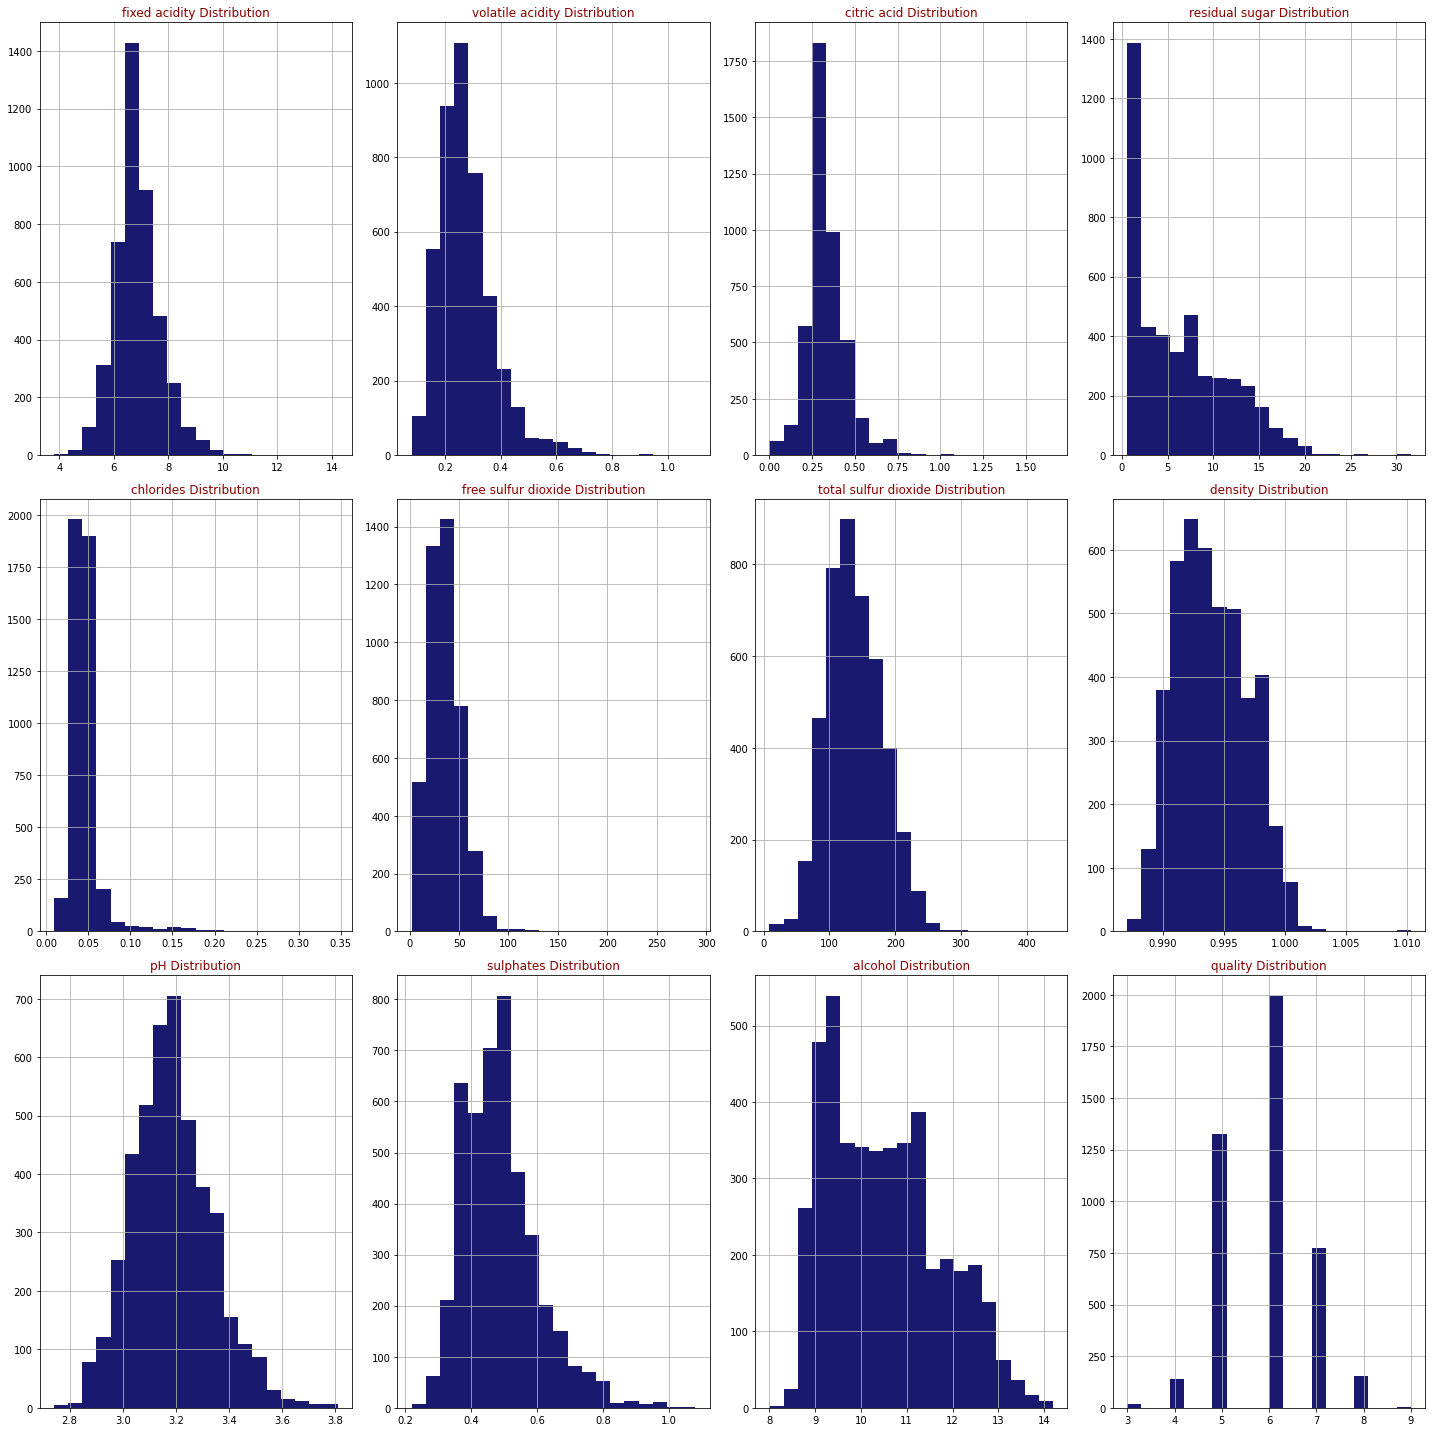

In [110]:
draw_histograms(white_data,white_data.columns,3,4)

From above histogram plot of each variable most of features are right skewed 
This suggests that most of features are affected are outliners

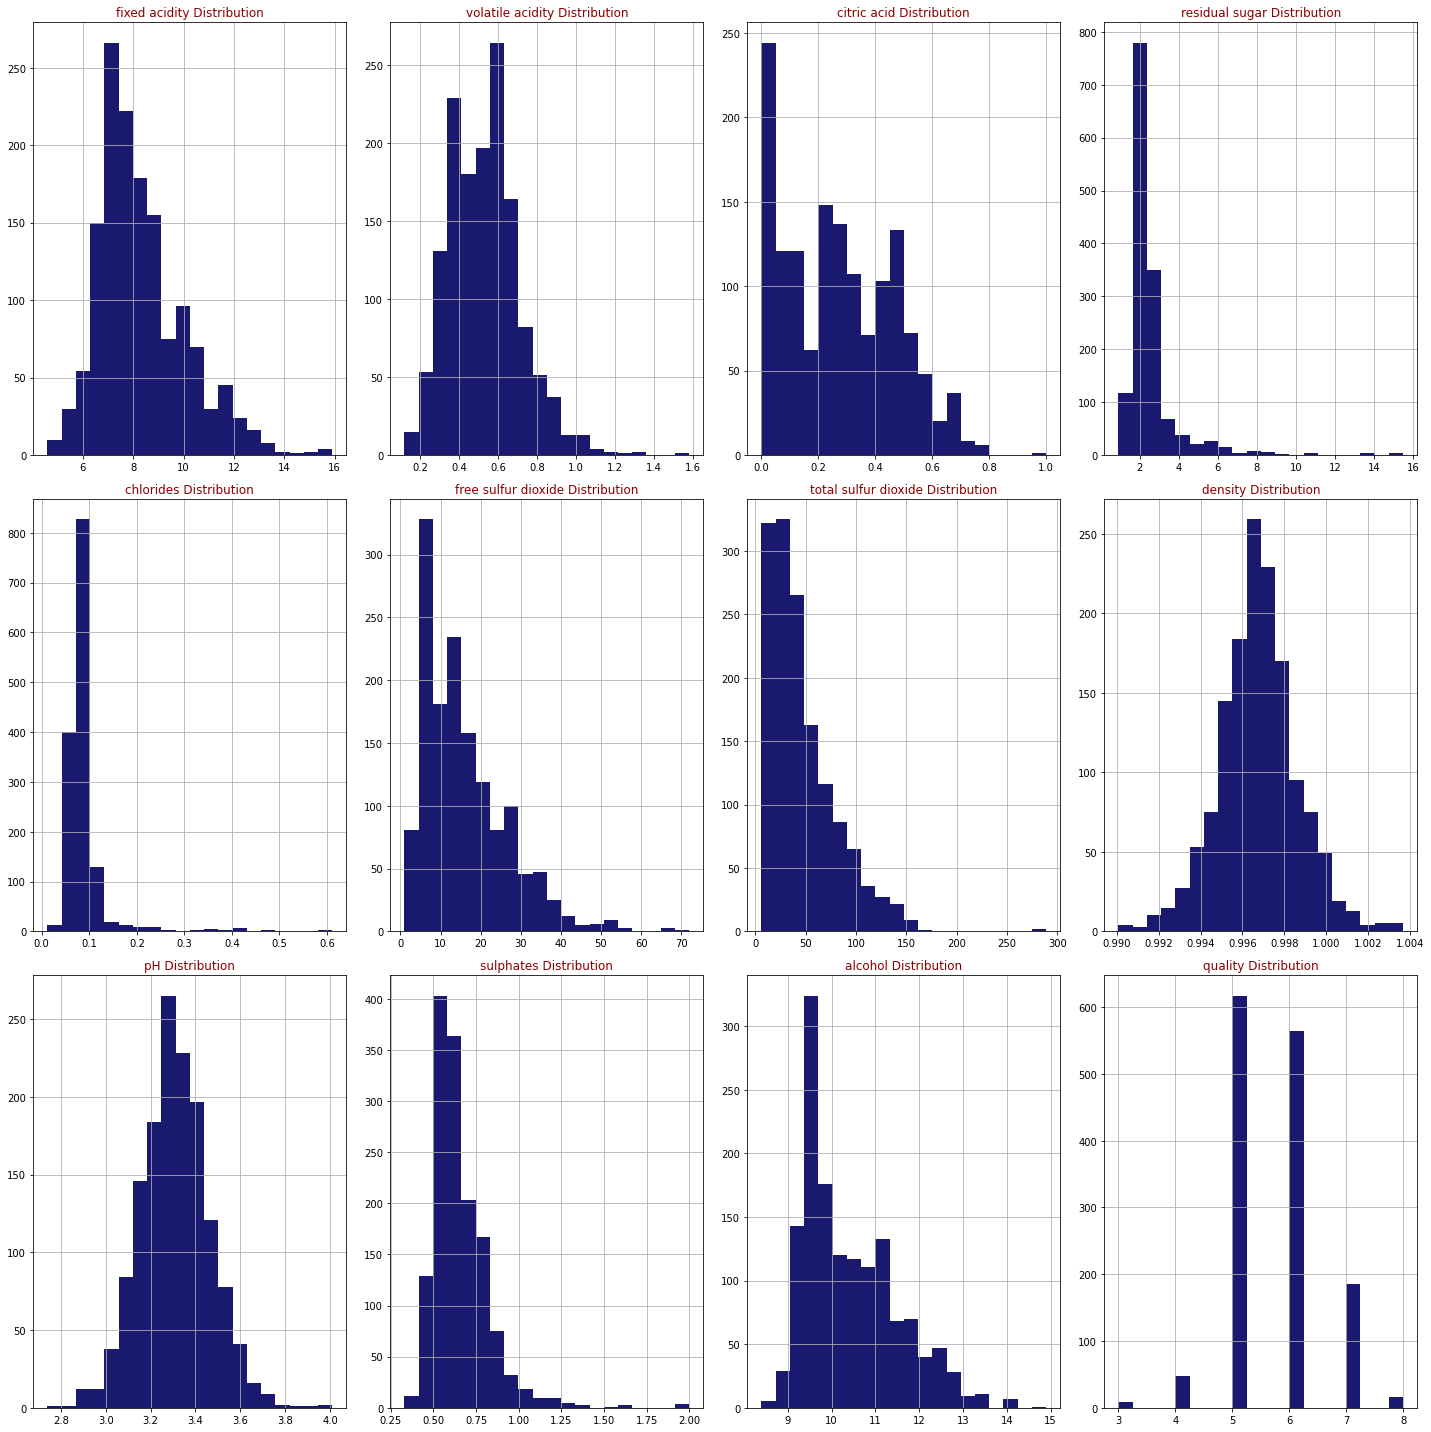

In [111]:
draw_histograms(red_data,red_data.columns,3,4)

From above histogram plot of each variable most of features are right skewed 
This suggests that most of features are affected are outliners

pH and density are in normal distribution 

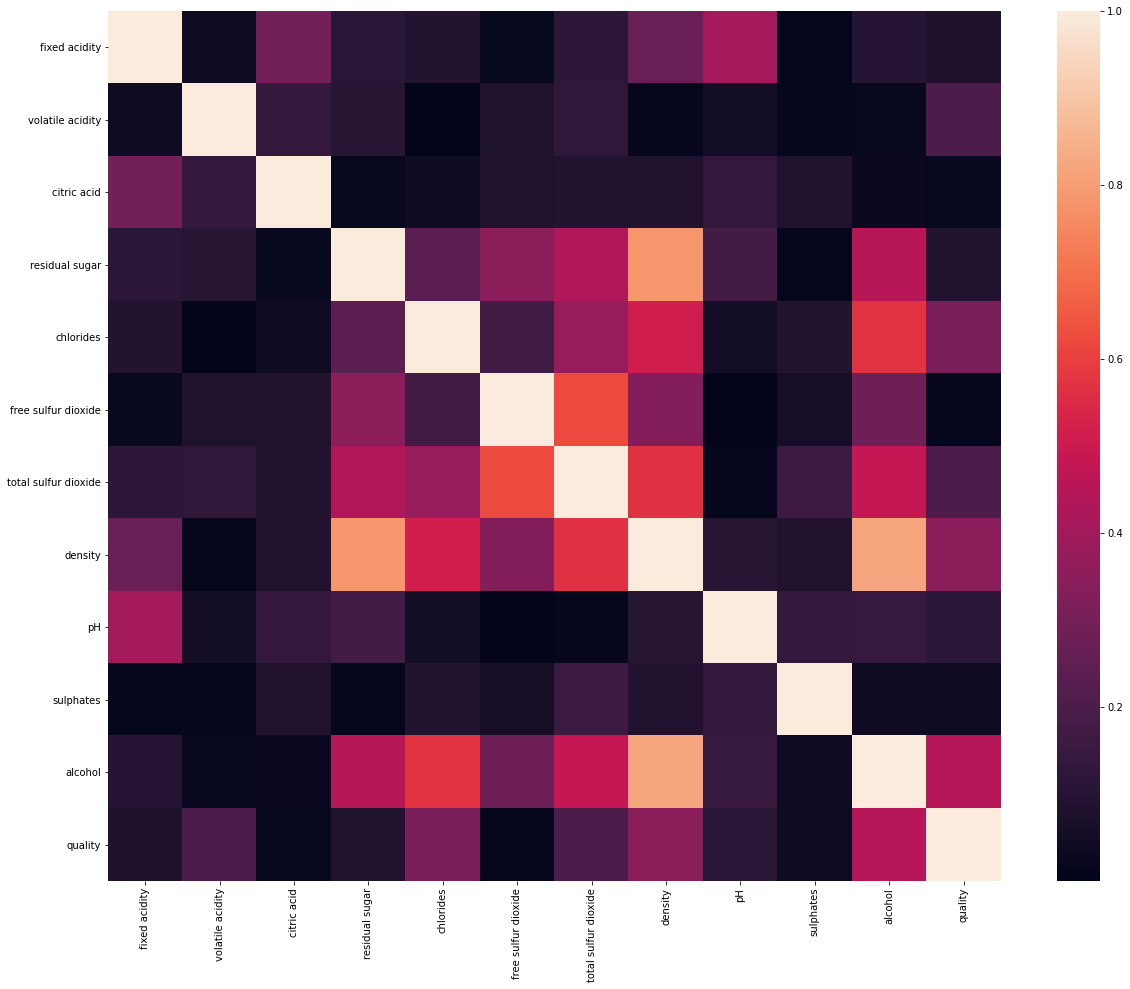

In [112]:
# feature extraction for white wine by eliminating correlated features
corrMatrix=white_data.corr(method='spearman')
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot=False)
plt.show()

1.density and alcohol are highly correlated
2.density and residual sugar are highly correlated  

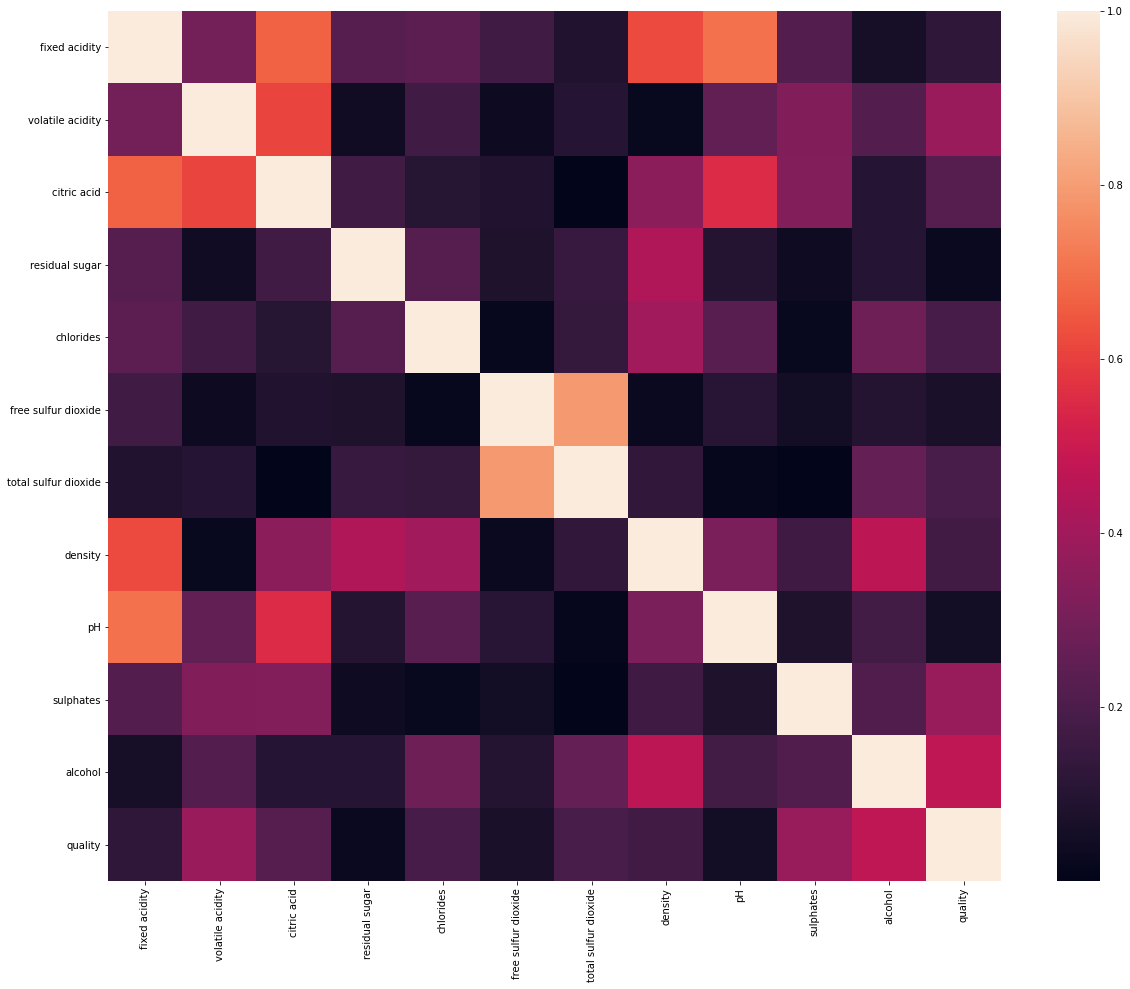

In [113]:
# feature extraction by eliminating correlated features
corrMatrix=red_data.corr(method='spearman')
fig,ax=plt.subplots(figsize=(20,16))
sns.heatmap(abs(corrMatrix),annot=False)
plt.show()

1.Free sulfur diaoxide and total sulfur diaoxide are correlated
2.pH, fixed acidity, and citric acid are highly correlated 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

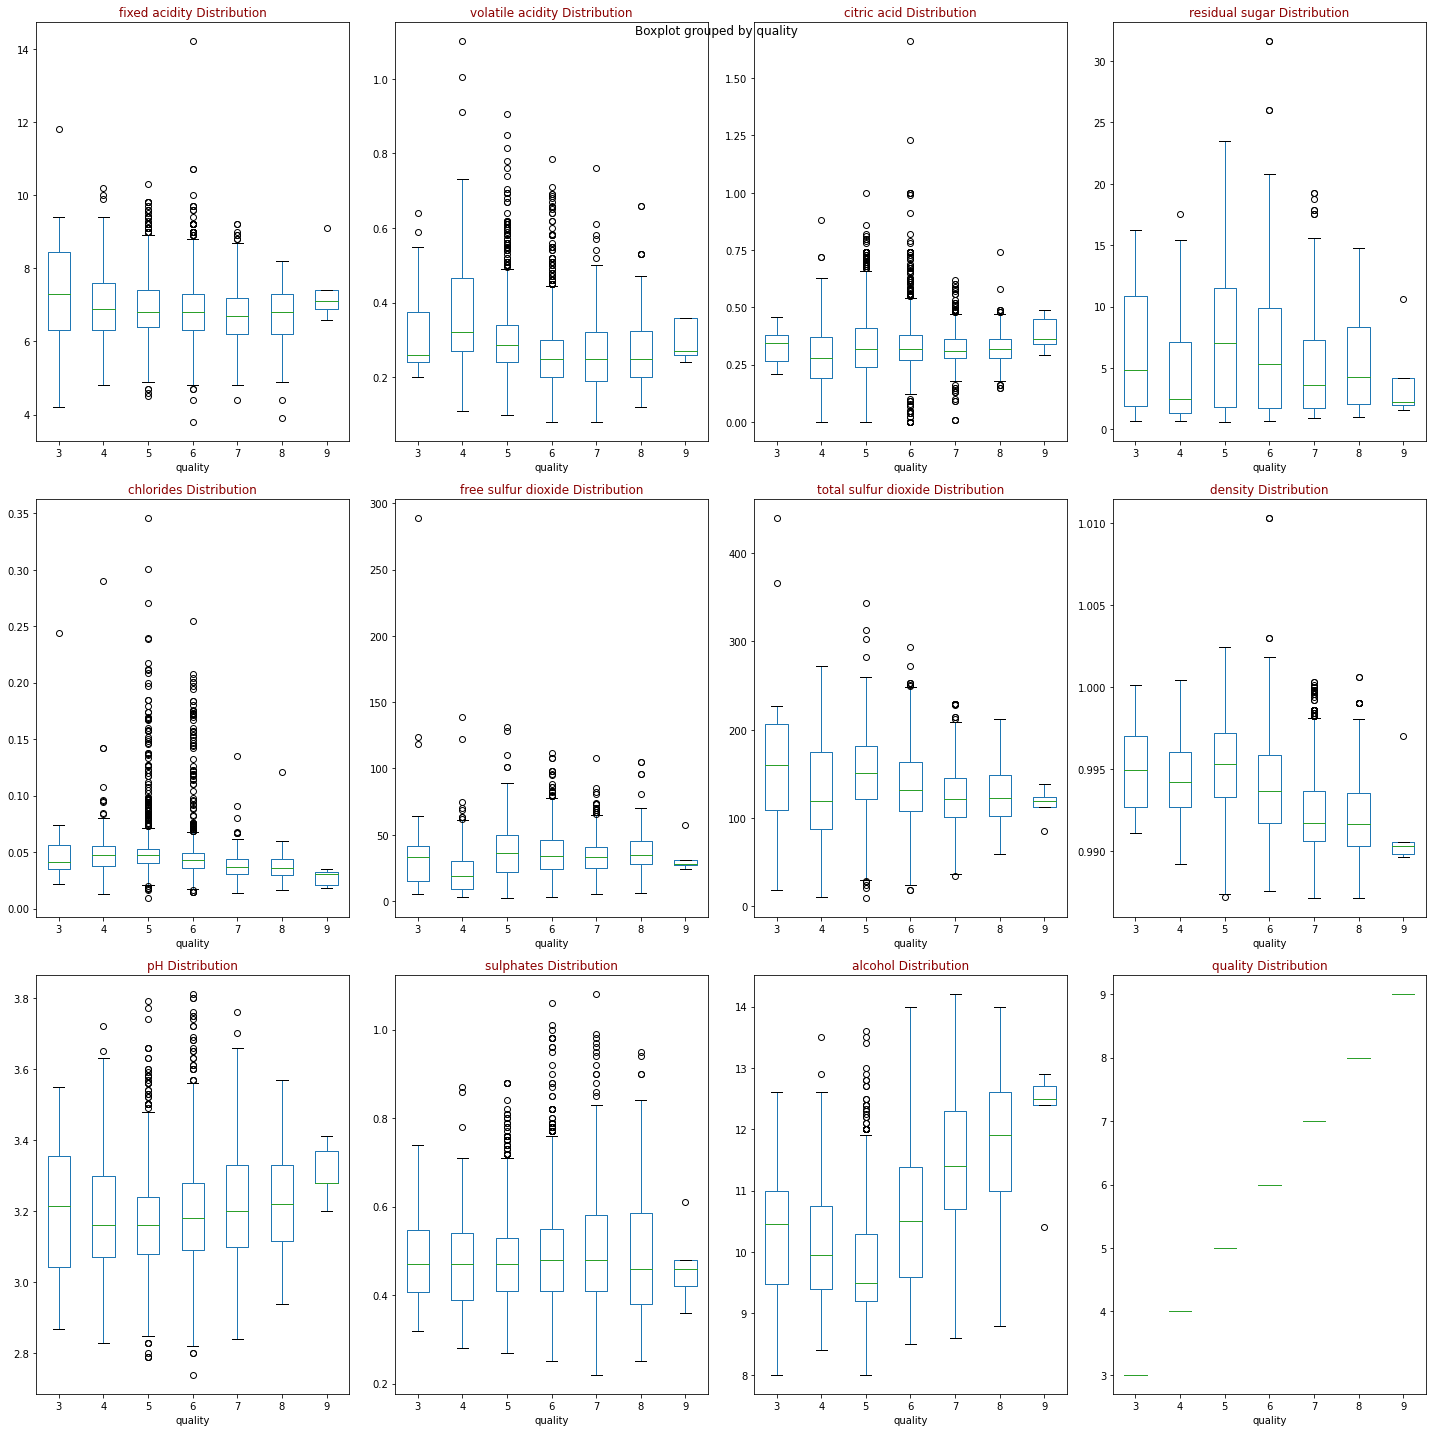

In [114]:
# box plot distribution 
draw_boxplot(white_data,white_data.columns,'quality',3,4)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

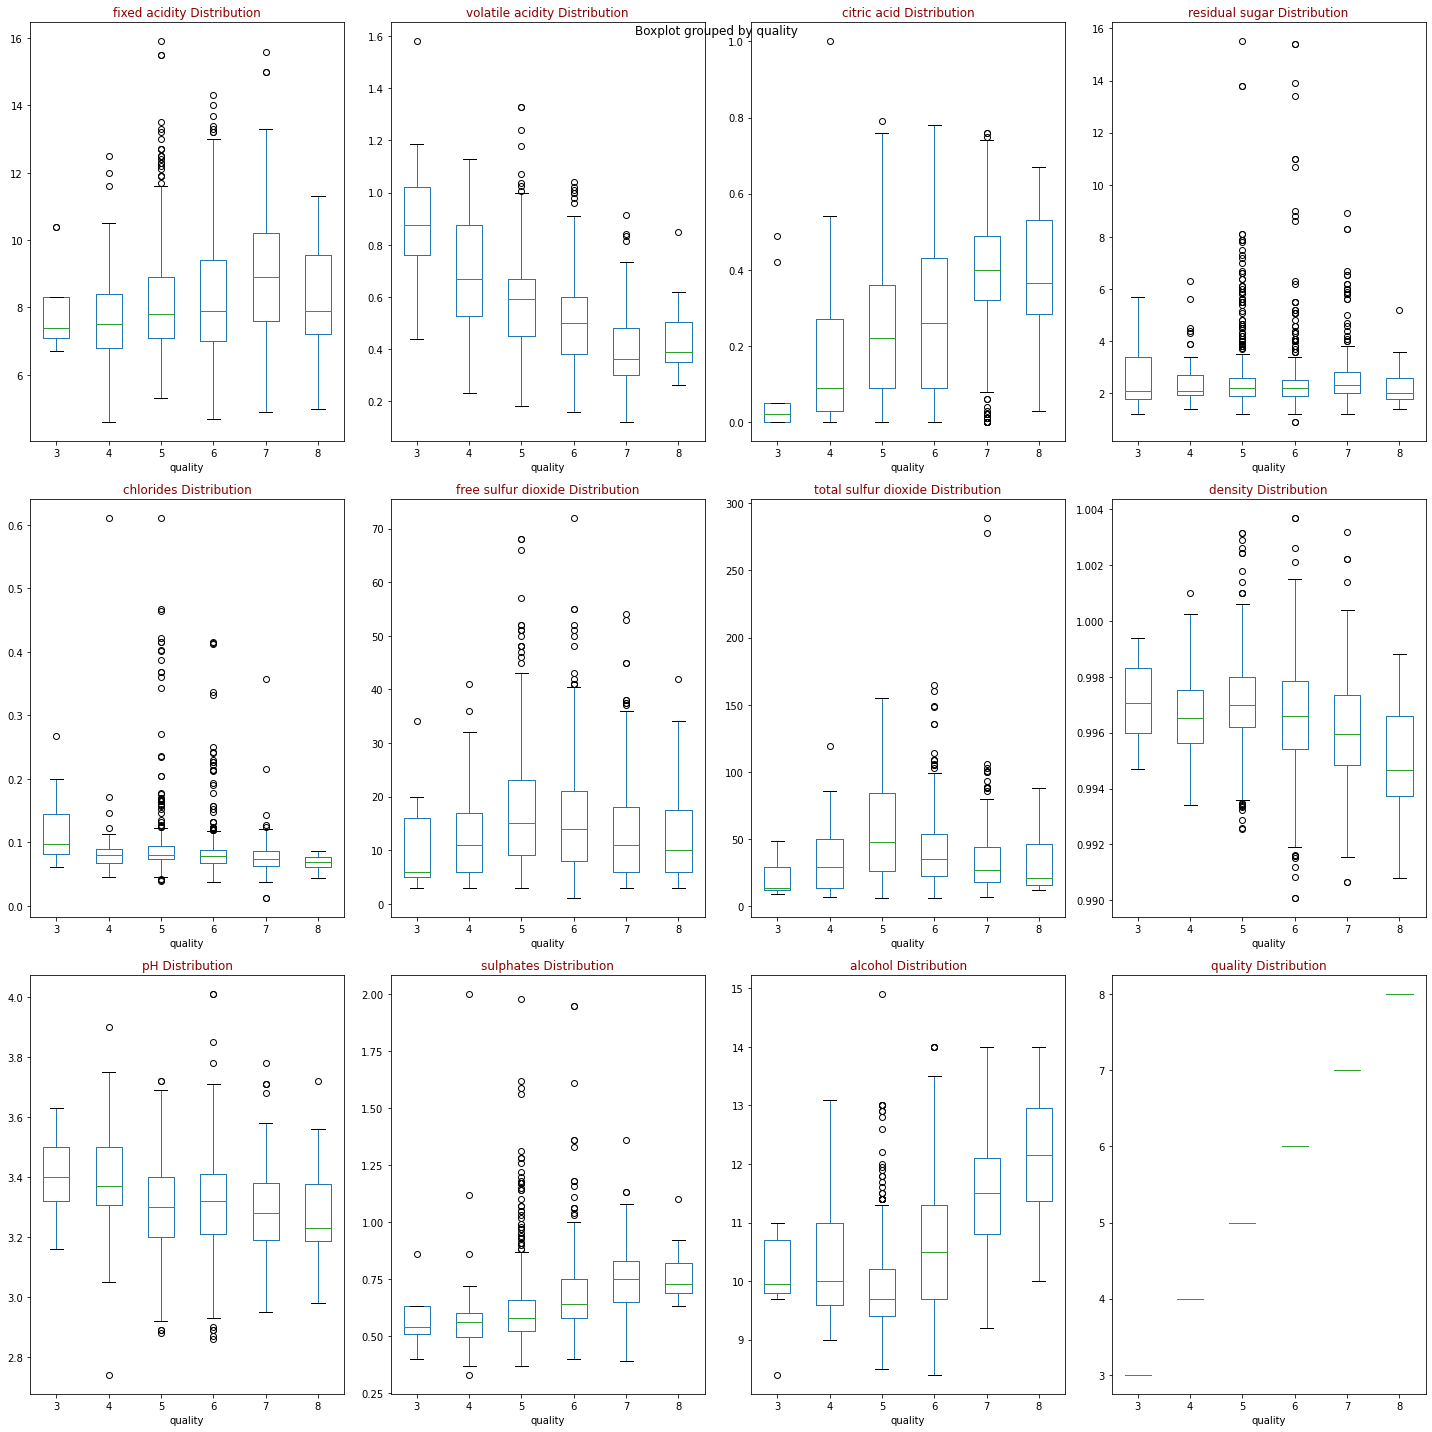

In [115]:
# box plot distribution 
draw_boxplot(red_data,red_data.columns,'quality',3,4)

# Data preproscessing

In [116]:
# splitting data into training and validation set 
red_train_features,red_val_features=train_test_split(red_data,test_size=0.2,random_state=0)
red_train_label,red_val_label=red_train_features['quality'],red_val_features['quality']
white_train_features,white_val_features=train_test_split(white_data,test_size=0.2,random_state=0)
white_train_label,white_val_label=white_train_features['quality'],white_val_features['quality']

In [117]:
# feature scaling for red
from sklearn.preprocessing import StandardScaler
scale_red=StandardScaler()
scale_red.fit(red_train_features.drop('quality',axis=1))
scaled_red_train_features=scale_red.fit_transform(red_train_features.drop('quality',axis=1))
scaled_red_val_features=scale_red.fit_transform(red_val_features.drop('quality',axis=1))

In [118]:
# feature scaling for white
scale_white=StandardScaler()
scale_white.fit(white_train_features.drop('quality',axis=1))
scaled_white_train_features=scale_white.fit_transform(white_train_features.drop('quality',axis=1))
scaled_white_val_features=scale_white.fit_transform(white_val_features.drop('quality',axis=1))

# Creating Models 

In [119]:
# importing important sklearn library functions
import sklearn
from sklearn.linear_model import Lasso , Ridge ,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer,accuracy_score

# Lasso Model

In [120]:
# weights visualization function
def Weights(model,features):
  weights_df=pd.DataFrame(features,columns=['featues'])
  weights_df['Coeff']=model.coef_
  print(weights_df)
  print("intercept:{}".format(model.intercept_))

In [121]:
# Lasso for red wine feature extraction 
red_model_lasso=Lasso(alpha=0.1)
red_model_lasso.fit(scaled_red_train_features,red_train_label)
Weights(red_model_lasso,red_train_features.drop('quality',axis=1).columns.values)

                 featues     Coeff
0          fixed acidity  0.000000
1       volatile acidity -0.167342
2            citric acid  0.000000
3         residual sugar  0.000000
4              chlorides -0.000000
5    free sulfur dioxide -0.000000
6   total sulfur dioxide -0.000000
7                density -0.000000
8                     pH -0.000000
9              sulphates  0.032299
10               alcohol  0.259354
intercept:5.65855777584709


In [122]:
print("validation:\n")
performance_checker(red_model_lasso,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_model_lasso,scaled_red_train_features,red_train_label)

validation:

Mean squared error : 0.4213538108589058
r2_score : 0.25602923859244964
Accuracy : 0.5694444444444444
   predicted  actual  predicted_approx
0   5.410522       5                 5
1   5.424820       5                 5
2   6.079839       6                 6
3   6.015782       6                 6
4   5.457028       5                 5
5   5.366287       5                 5
6   5.681706       5                 6
7   5.561382       5                 6
8   5.505593       5                 6
9   6.288386       7                 6

Training:

Mean squared error : 0.4667573769859607
r2_score : 0.3119510058924313
Accuracy : 0.5551694178974804
   predicted  actual  predicted_approx
0   5.667983       5                 6
1   5.810348       5                 6
2   5.653584       5                 6
3   5.342799       5                 5
4   5.738921       6                 6
5   5.359870       6                 5
6   5.440966       5                 5
7   5.730806       6             

In [123]:
# searching for better hyperparameter using gridsearch
param_grid = {'alpha': [0.001,0.005,0.01,0.05,0.1,1], 'max_iter': [100,200,500,1000,2000]}
red_grid_lasso = GridSearchCV(Lasso(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
red_grid_lasso.fit(scaled_red_train_features,red_train_label)
red_grid_lasso.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] alpha=0.001, max_iter=100 .......................................
[CV] .......... alpha=0.001, max_iter=100, score=-0.477, total=   0.0s
[CV] alpha=0.001, max_iter=100 .......................................
[CV] .......... alpha=0.001, max_iter=100, score=-0.440, total=   0.0s
[CV] alpha=0.001, max_iter=100 .......................................
[CV] .......... alpha=0.001, max_iter=100, score=-0.397, total=   0.0s
[CV] alpha=0.001, max_iter=100 .......................................
[CV] .......... alpha=0.001, max_iter=100, score=-0.466, total=   0.0s
[CV] alpha=0.001, max_iter=100 .......................................
[CV] .......... alpha=0.001, max_iter=100, score=-0.429, total=   0.0s
[CV] alpha=0.001, max_iter=200 .......................................
[CV] .......... alpha=0.001, max_iter=200, score=-0.477, total=   0.0s
[CV] alpha=0.001, max_iter=200 .......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... alpha=0.005, max_iter=2000, score=-0.438, total=   0.0s
[CV] alpha=0.005, max_iter=2000 ......................................
[CV] ......... alpha=0.005, max_iter=2000, score=-0.398, total=   0.0s
[CV] alpha=0.005, max_iter=2000 ......................................
[CV] ......... alpha=0.005, max_iter=2000, score=-0.465, total=   0.0s
[CV] alpha=0.005, max_iter=2000 ......................................
[CV] ......... alpha=0.005, max_iter=2000, score=-0.429, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.478, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.435, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.400, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


{'alpha': 0.01, 'max_iter': 100}

In [124]:
# model prepartion to find coeffiecient
red_model_lasso=Lasso(alpha=0.01,max_iter=100)
red_model_lasso.fit(scaled_red_train_features,red_train_label)
Weights(red_model_lasso,red_train_features.drop('quality',axis=1).columns.values)

                 featues     Coeff
0          fixed acidity  0.005904
1       volatile acidity -0.198484
2            citric acid -0.000000
3         residual sugar  0.022829
4              chlorides -0.079546
5    free sulfur dioxide  0.008413
6   total sulfur dioxide -0.071615
7                density -0.000000
8                     pH -0.041007
9              sulphates  0.131268
10               alcohol  0.308482
intercept:5.65855777584709


In [125]:
print("validation:\n")
performance_checker(red_model_lasso,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_model_lasso,scaled_red_train_features,red_train_label)

validation:

Mean squared error : 0.3958617159774136
r2_score : 0.3010398039417874
Accuracy : 0.6284722222222222
   predicted  actual  predicted_approx
0   5.303366       5                 5
1   5.262474       5                 5
2   6.184586       6                 6
3   6.102235       6                 6
4   5.230259       5                 5
5   5.117955       5                 5
6   5.416376       5                 5
7   5.555533       5                 6
8   5.445306       5                 5
9   6.254653       7                 6

Training:

Mean squared error : 0.43175403790663386
r2_score : 0.3635495738667761
Accuracy : 0.577758470894874
   predicted  actual  predicted_approx
0   5.517804       5                 6
1   5.865544       5                 6
2   5.679400       5                 6
3   5.207238       5                 5
4   5.816483       6                 6
5   5.307881       6                 5
6   5.412124       5                 5
7   5.766727       6              

1.   density and citric acid  can be eliminated for red wine
2.   



In [126]:
# Lasso for white wine feature extraction 
white_model_lasso=Lasso(alpha=0.1)
white_model_lasso.fit(scaled_white_train_features,white_train_label)
Weights(white_model_lasso,white_train_features.drop('quality',axis=1).columns.values)

                 featues     Coeff
0          fixed acidity -0.000000
1       volatile acidity -0.076272
2            citric acid  0.000000
3         residual sugar  0.000000
4              chlorides -0.000000
5    free sulfur dioxide  0.000000
6   total sulfur dioxide -0.000000
7                density -0.000000
8                     pH  0.000000
9              sulphates  0.000000
10               alcohol  0.283079
intercept:5.871242200794101


In [127]:
# searching for better hyperparameter using gridsearch
param_grid = {'alpha': [0.01,0.05,0.1,1], 'max_iter': [100,200,500,1000,2000]}
white_grid_lasso = GridSearchCV(Lasso(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
white_grid_lasso.fit(scaled_white_train_features,white_train_label)
white_grid_lasso.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.593, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.563, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.514, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.600, total=   0.0s
[CV] alpha=0.01, max_iter=100 ........................................
[CV] ........... alpha=0.01, max_iter=100, score=-0.605, total=   0.0s
[CV] alpha=0.01, max_iter=200 ........................................
[CV] ........... alpha=0.01, max_iter=200, score=-0.593, total=   0.0s
[CV] alpha=0.01, max_iter=200 ........................................
[CV] ........... alpha=0.01, max_iter=200, score=-0.563, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.05, max_iter=200 ........................................
[CV] ........... alpha=0.05, max_iter=200, score=-0.617, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.619, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.594, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.535, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.630, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.617, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] .......... alpha=0.05, max_iter=1000, score=-0.619, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


{'alpha': 0.01, 'max_iter': 100}

In [128]:
# model prepartion to find coeffiecient
white_model_lasso=Lasso(alpha=0.01,max_iter=100)
white_model_lasso.fit(scaled_white_train_features,white_train_label)
Weights(white_model_lasso,white_train_features.drop('quality',axis=1).columns.values)

                 featues     Coeff
0          fixed acidity -0.000000
1       volatile acidity -0.170525
2            citric acid  0.000000
3         residual sugar  0.211139
4              chlorides -0.015261
5    free sulfur dioxide  0.048670
6   total sulfur dioxide -0.011618
7                density -0.166630
8                     pH  0.056392
9              sulphates  0.042955
10               alcohol  0.338914
intercept:5.871242200794099


citric acid and fixed acidity can be eliminated for white wine
And density can be eliminated due to its highly correlation with residual sugar and alcohol

# Feature Selection

In [130]:
red_selected_features=['volatile acidity', 'residual sugar',
       'chlorides','free sulfur dioxide', 'total sulfur dioxide' ,
       'pH', 'sulphates', 'alcohol']

In [ ]:
white_selected_features=['volatile acidity', 'residual sugar',
       'chlorides', 'free sulfur dioxide','total sulfur dioxide' ,
       'pH', 'sulphates', 'alcohol']

# Ridge Model

In [132]:
# feature scaling for red
from sklearn.preprocessing import StandardScaler
red_scale=StandardScaler()
red_scale.fit(red_train_features[red_selected_features])
scaled_red_train_features=red_scale.fit_transform(red_train_features[red_selected_features])
scaled_red_val_features=red_scale.fit_transform(red_val_features[red_selected_features])

In [133]:
# feature scaling for white
white_scale=StandardScaler()
white_scale.fit(white_train_features[white_selected_features])
scaled_white_train_features=white_scale.fit_transform(white_train_features[white_selected_features])
scaled_white_val_features=white_scale.fit_transform(white_val_features[white_selected_features])

In [134]:
# Ridge model for red
red_model_ridge=Ridge(alpha=0.1)
red_model_ridge.fit(scaled_red_train_features,red_train_label)
print("validation:\n")
performance_checker(red_model_ridge,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_model_ridge,scaled_red_train_features,red_train_label)


validation:

Mean squared error : 0.3969584994889396
r2_score : 0.29910324885876594
Accuracy : 0.625
   predicted  actual  predicted_approx
0   5.274156       5                 5
1   5.227991       5                 5
2   6.181931       6                 6
3   6.109957       6                 6
4   5.185024       5                 5
5   5.061508       5                 5
6   5.317480       5                 5
7   5.544307       5                 6
8   5.425903       5                 5
9   6.220803       7                 6

Training:

Mean squared error : 0.4305162907199345
r2_score : 0.3653741421516252
Accuracy : 0.579496090356212
   predicted  actual  predicted_approx
0   5.433615       5                 5
1   5.859688       5                 6
2   5.660291       5                 6
3   5.216938       5                 5
4   5.844999       6                 6
5   5.311361       6                 5
6   5.468676       5                 5
7   5.762201       6                 6
8   4.48

In [135]:
# searching for better hyperparameter using gridsearch
param_grid = {'alpha': [0.05,0.1,1,5,10,30,50,100], 'max_iter': [500,1000,2000]}
red_grid_ridge = GridSearchCV(Ridge(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
red_grid_ridge.fit(scaled_red_train_features,red_train_label)
red_grid_ridge.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.469, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.441, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.396, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.466, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.427, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] .......... alpha=0.05, max_iter=1000, score=-0.469, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............ alpha=30, max_iter=1000, score=-0.465, total=   0.0s
[CV] alpha=30, max_iter=1000 .........................................
[CV] ............ alpha=30, max_iter=1000, score=-0.426, total=   0.0s
[CV] alpha=30, max_iter=2000 .........................................
[CV] ............ alpha=30, max_iter=2000, score=-0.472, total=   0.0s
[CV] alpha=30, max_iter=2000 .........................................
[CV] ............ alpha=30, max_iter=2000, score=-0.440, total=   0.0s
[CV] alpha=30, max_iter=2000 .........................................
[CV] ............ alpha=30, max_iter=2000, score=-0.395, total=   0.0s
[CV] alpha=30, max_iter=2000 .........................................
[CV] ............ alpha=30, max_iter=2000, score=-0.465, total=   0.0s
[CV] alpha=30, max_iter=2000 .........................................
[CV] ............ alpha=30, max_iter=2000, score=-0.426, total=   0.0s
[CV] alpha=50, max_iter=500 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.3s finished


{'alpha': 50, 'max_iter': 500}

In [136]:
print("validation:\n")
performance_checker(red_grid_ridge,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_grid_ridge,scaled_red_train_features,red_train_label)


validation:

Mean squared error : 0.39559094976086934
r2_score : 0.30151788707072646
Accuracy : 0.6284722222222222
   predicted  actual  predicted_approx
0   5.288480       5                 5
1   5.240203       5                 5
2   6.168936       6                 6
3   6.099088       6                 6
4   5.199167       5                 5
5   5.083634       5                 5
6   5.337070       5                 5
7   5.550747       5                 6
8   5.438450       5                 5
9   6.208195       7                 6

Training:

Mean squared error : 0.4307849037364287
r2_score : 0.36497817858486503
Accuracy : 0.58123370981755
   predicted  actual  predicted_approx
0   5.449813       5                 5
1   5.857185       5                 6
2   5.668505       5                 6
3   5.224466       5                 5
4   5.835829       6                 6
5   5.322069       6                 5
6   5.463922       5                 5
7   5.762096       6             

In [137]:
# Ridge model for white
white_model_ridge=Ridge(alpha=0.1)
white_model_ridge.fit(scaled_white_train_features,white_train_label)
print("validation:\n")
performance_checker(white_model_ridge,scaled_white_val_features,white_val_label)
print("\nTraining:\n")
performance_checker(white_model_ridge,scaled_white_train_features,white_train_label)

validation:

Mean squared error : 0.518713977786649
r2_score : 0.3229529321213068
Accuracy : 0.5430839002267573
   predicted  actual  predicted_approx
0   6.005131       7                 6
1   6.821217       7                 7
2   5.084483       5                 5
3   5.210820       5                 5
4   6.534882       6                 7
5   5.943427       6                 6
6   6.394871       6                 6
7   6.442233       7                 6
8   5.584851       6                 6
9   5.991311       6                 6

Training:

Mean squared error : 0.5742752754800173
r2_score : 0.2581564350532375
Accuracy : 0.5246738513896767
   predicted  actual  predicted_approx
0   4.871023       6                 5
1   5.476524       5                 5
2   6.080616       7                 6
3   6.180093       6                 6
4   5.940828       5                 6
5   6.266239       8                 6
6   5.455043       6                 5
7   5.334836       6               

In [138]:
# searching for better hyperparameter using gridsearch
param_grid = {'alpha': [0.05,0.1,1,5,10,30,50,100], 'max_iter': [500,1000,2000]}
white_grid_ridge = GridSearchCV(Ridge(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
white_grid_ridge.fit(scaled_white_train_features,white_train_label)
white_grid_ridge.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.596, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.566, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........... alpha=0.05, max_iter=500, score=-0.518, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.600, total=   0.0s
[CV] alpha=0.05, max_iter=500 ........................................
[CV] ........... alpha=0.05, max_iter=500, score=-0.613, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] .......... alpha=0.05, max_iter=1000, score=-0.596, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] .......... alpha=0.05, max_iter=1000, score=-0.566, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] .......... alpha=0.05, max_iter=1000, score=-0.518, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] .......... alpha=0.05, max_iter=1000, score=-0.600, total=   0.0s
[CV] alpha=0.05, max_iter=1000 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.5s finished


{'alpha': 30, 'max_iter': 500}

In [139]:
print("validation:\n")
performance_checker(white_grid_ridge,scaled_white_val_features,white_val_label)
print("\nTraining:\n")
performance_checker(white_grid_ridge,scaled_white_train_features,white_train_label)

validation:

Mean squared error : 0.5191454209815766
r2_score : 0.32238979451061744
Accuracy : 0.5408163265306123
   predicted  actual  predicted_approx
0   6.004579       7                 6
1   6.807990       7                 7
2   5.086083       5                 5
3   5.206603       5                 5
4   6.528649       6                 7
5   5.940877       6                 6
6   6.386893       6                 6
7   6.438575       7                 6
8   5.591780       6                 6
9   5.990695       6                 6

Training:

Mean squared error : 0.574306328187276
r2_score : 0.2581163214491219
Accuracy : 0.5238230289279637
   predicted  actual  predicted_approx
0   4.876664       6                 5
1   5.479767       5                 5
2   6.082057       7                 6
3   6.177245       6                 6
4   5.940581       5                 6
5   6.260151       8                 6
6   5.459376       6                 5
7   5.341632       6              

# Elastic Model

In [140]:
# Elastic model for red
red_model_elastic=ElasticNet(alpha=0.1,l1_ratio=0.6)
red_model_elastic.fit(scaled_red_train_features,red_train_label)
print("validation:\n")
performance_checker(red_model_elastic,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_model_elastic,scaled_red_train_features,red_train_label)

validation:

Mean squared error : 0.40912321256881096
r2_score : 0.2776244094152873
Accuracy : 0.6006944444444444
   predicted  actual  predicted_approx
0   5.379530       5                 5
1   5.470715       5                 5
2   6.124118       6                 6
3   6.044534       6                 6
4   5.410379       5                 5
5   5.290282       5                 5
6   5.654108       5                 6
7   5.542511       5                 6
8   5.497519       5                 5
9   6.328825       7                 6

Training:

Mean squared error : 0.45261710636998637
r2_score : 0.3327952377212998
Accuracy : 0.5647263249348393
   predicted  actual  predicted_approx
0   5.640031       5                 6
1   5.815909       5                 6
2   5.668775       5                 6
3   5.294109       5                 5
4   5.755753       6                 6
5   5.353008       6                 5
6   5.434225       5                 5
7   5.738149       6            

In [141]:
# searching for better hyperparameter using gridsearch
param_grid = {'alpha': [0.005,0.01,0.05,0.1,1,5,10],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.8], 'max_iter': [200,300,500,1000,2000]}
red_grid_elastic = GridSearchCV(ElasticNet(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
red_grid_elastic.fit(scaled_red_train_features,red_train_label)
red_grid_elastic.best_params_

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.470, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.440, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.396, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.465, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.427, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=300 .........................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  alpha=0.005, l1_ratio=0.2, max_iter=300, score=-0.470, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=300 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=300, score=-0.440, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=300 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=300, score=-0.396, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=300 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=300, score=-0.465, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=300 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=300, score=-0.427, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=500 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=500, score=-0.470, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=500 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=500, score=-0.440, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=500 ...

[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:    2.9s finished


{'alpha': 0.01, 'l1_ratio': 0.2, 'max_iter': 200}

In [142]:
print("validation:\n")
performance_checker(red_grid_elastic,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_grid_elastic,scaled_red_train_features,red_train_label)

validation:

Mean squared error : 0.3962688786187529
r2_score : 0.3003208900682509
Accuracy : 0.625
   predicted  actual  predicted_approx
0   5.281060       5                 5
1   5.237737       5                 5
2   6.179833       6                 6
3   6.107024       6                 6
4   5.196637       5                 5
5   5.076974       5                 5
6   5.340952       5                 5
7   5.546011       5                 6
8   5.431287       5                 5
9   6.224837       7                 6

Training:

Mean squared error : 0.4306066934795041
r2_score : 0.3652408790670907
Accuracy : 0.58123370981755
   predicted  actual  predicted_approx
0   5.453686       5                 5
1   5.859473       5                 6
2   5.664832       5                 6
3   5.215746       5                 5
4   5.838650       6                 6
5   5.312506       6                 5
6   5.456931       5                 5
7   5.762158       6                 6
8   4.5027

In [143]:
# Elastic model for white
white_model_elastic=ElasticNet(alpha=0.1,l1_ratio=0.6)
white_model_elastic.fit(scaled_white_train_features,white_train_label)
print("validation:\n")
performance_checker(white_model_elastic,scaled_white_val_features,white_val_label)
print("\nTraining:\n")
performance_checker(white_model_elastic,scaled_white_train_features,white_train_label)

validation:

Mean squared error : 0.5612397235433619
r2_score : 0.26744655923196925
Accuracy : 0.5136054421768708
   predicted  actual  predicted_approx
0   5.943296       7                 6
1   6.386575       7                 6
2   5.506256       5                 6
3   5.514162       5                 6
4   6.399272       6                 6
5   5.914381       6                 6
6   6.211118       6                 6
7   6.083519       7                 6
8   5.883841       6                 6
9   5.885800       6                 6

Training:

Mean squared error : 0.6065343059988997
r2_score : 0.21648451354860576
Accuracy : 0.504254112308565
   predicted  actual  predicted_approx
0   5.330188       6                 5
1   5.622868       5                 6
2   6.105172       7                 6
3   6.054659       6                 6
4   5.910274       5                 6
5   6.103550       8                 6
6   5.566650       6                 6
7   5.669336       6             

In [144]:
# searching for better hyperparameter using gridsearch
param_grid = {'alpha': [0.005,0.01,0.05,0.1,1,5,10],'l1_ratio':[0.2,0.3,0.4,0.5,0.6,0.8], 'max_iter': [200,300,500,1000,2000]}
white_grid_elastic = GridSearchCV(ElasticNet(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
white_grid_elastic.fit(scaled_white_train_features,white_train_label)
white_grid_elastic.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.596, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.566, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.518, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.601, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=200 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=200, score=-0.612, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=300 .........................
[CV]  alpha=0.005, l1_ratio=0.2, max_iter=300, score=-0.596, total=   0.0s
[CV] alpha=0.005, l1_ratio=0.2, max_iter=300 ...............

[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:    4.2s finished


{'alpha': 0.005, 'l1_ratio': 0.2, 'max_iter': 200}

In [145]:
print("validation:\n")
performance_checker(white_grid_elastic,scaled_white_val_features,white_val_label)
print("\nTraining:\n")
performance_checker(white_grid_elastic,scaled_white_train_features,white_train_label)

validation:

Mean squared error : 0.5189395814587234
r2_score : 0.32265846482097993
Accuracy : 0.5408163265306123
   predicted  actual  predicted_approx
0   6.004020       7                 6
1   6.808262       7                 7
2   5.090335       5                 5
3   5.213727       5                 5
4   6.531081       6                 7
5   5.945101       6                 6
6   6.387201       6                 6
7   6.432944       7                 6
8   5.592069       6                 6
9   5.988977       6                 6

Training:

Mean squared error : 0.5743050913001515
r2_score : 0.25811791924863203
Accuracy : 0.5238230289279637
   predicted  actual  predicted_approx
0   4.880052       6                 5
1   5.481927       5                 5
2   6.081736       7                 6
3   6.176616       6                 6
4   5.940511       5                 6
5   6.261107       8                 6
6   5.460536       6                 5
7   5.345694       6            

# Random Forest regrssion

In [146]:
# random forest model for red
from sklearn.ensemble import RandomForestRegressor
red_model_rfr = RandomForestRegressor()
red_model_rfr.fit(red_train_features[red_selected_features],red_train_label)
print("validation:\n")
performance_checker(red_model_rfr,red_val_features[red_selected_features],red_val_label)
print("\nTraining:\n")
performance_checker(red_model_rfr,red_train_features[red_selected_features],red_train_label)

validation:

Mean squared error : 0.29076111111111114
r2_score : 0.4866125340599453
Accuracy : 0.7118055555555556
   predicted  actual  predicted_approx
0       5.05       5                 5
1       5.04       5                 5
2       6.13       6                 6
3       5.56       6                 6
4       4.95       5                 5
5       5.25       5                 5
6       5.41       5                 5
7       5.10       5                 5
8       5.48       5                 5
9       6.10       7                 6

Training:

Mean squared error : 0.05188792354474371
r2_score : 0.9235117957174458
Accuracy : 0.9548218940052129
   predicted  actual  predicted_approx
0       5.07       5                 5
1       5.21       5                 5
2       5.19       5                 5
3       5.13       5                 5
4       6.07       6                 6
5       5.82       6                 6
6       5.20       5                 5
7       5.93       6            

In [147]:
param_grid = {'max_depth': [10,20,30],'max_leaf_nodes': [10,20,50,100]}
red_grid_rfr = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
red_grid_rfr.fit(red_train_features[red_selected_features],red_train_label)
red_grid_rfr.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=10, max_leaf_nodes=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.484, total=   0.3s
[CV] max_depth=10, max_leaf_nodes=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.421, total=   0.2s
[CV] max_depth=10, max_leaf_nodes=10 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.405, total=   0.3s
[CV] max_depth=10, max_leaf_nodes=10 .................................
[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.428, total=   0.3s
[CV] max_depth=10, max_leaf_nodes=10 .................................
[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.422, total=   0.2s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.445, total=   0.3s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.408, total=   0.3s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.403, total=   0.3s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.406, total=   0.3s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   19.1s finished


{'max_depth': 30, 'max_leaf_nodes': 100}

In [148]:
print("validation:\n")
performance_checker(red_grid_rfr,red_val_features[red_selected_features],red_val_label)
print("\nTraining:\n")
performance_checker(red_grid_rfr,red_train_features[red_selected_features],red_train_label)

validation:

Mean squared error : 0.3079359391754448
r2_score : 0.45628749704172133
Accuracy : 0.6909722222222222
   predicted  actual  predicted_approx
0   5.147422       5                 5
1   5.114774       5                 5
2   6.205313       6                 6
3   5.663576       6                 6
4   5.056029       5                 5
5   5.176698       5                 5
6   5.293620       5                 5
7   5.103287       5                 5
8   5.538801       5                 6
9   6.025156       7                 6

Training:

Mean squared error : 0.13687413764365608
r2_score : 0.7982332634286546
Accuracy : 0.8357949609035621
   predicted  actual  predicted_approx
0   5.149685       5                 5
1   5.305780       5                 5
2   5.391676       5                 5
3   5.172921       5                 5
4   6.038662       6                 6
5   5.717338       6                 6
6   5.278918       5                 5
7   5.852804       6            

clearly above model is overfited

In [149]:
# random forest regression model for white wine 
white_model_rfr = RandomForestRegressor()
white_model_rfr.fit(white_train_features[white_selected_features],white_train_label)
print("validation:\n")
performance_checker(white_model_rfr,white_val_features[white_selected_features],white_val_label)
print("\nTraining:\n")
performance_checker(white_model_rfr,white_train_features[white_selected_features],white_train_label)

validation:

Mean squared error : 0.3785746031746032
r2_score : 0.5058686751677852
Accuracy : 0.6836734693877551
   predicted  actual  predicted_approx
0       7.00       7                 7
1       6.37       7                 6
2       5.47       5                 5
3       5.69       5                 6
4       7.24       6                 7
5       5.60       6                 6
6       6.38       6                 6
7       6.41       7                 6
8       4.99       6                 5
9       6.21       6                 6

Training:

Mean squared error : 0.0534747022121384
r2_score : 0.9309218672345583
Accuracy : 0.9583096993760635
   predicted  actual  predicted_approx
0       5.89       6                 6
1       5.04       5                 5
2       6.79       7                 7
3       6.08       6                 6
4       5.13       5                 5
5       7.51       8                 8
6       5.70       6                 6
7       5.91       6              

In [150]:
param_grid = {'max_depth': [10,20,30],'max_leaf_nodes': [10,20,50,100]}
white_grid_rfr = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=3,scoring='neg_mean_squared_error')
white_grid_rfr.fit(white_train_features[white_selected_features],white_train_label)
white_grid_rfr.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=10, max_leaf_nodes=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.529, total=   0.5s
[CV] max_depth=10, max_leaf_nodes=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.548, total=   0.5s
[CV] max_depth=10, max_leaf_nodes=10 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.478, total=   0.5s
[CV] max_depth=10, max_leaf_nodes=10 .................................
[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.577, total=   0.5s
[CV] max_depth=10, max_leaf_nodes=10 .................................
[CV] .... max_depth=10, max_leaf_nodes=10, score=-0.557, total=   0.5s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.502, total=   0.6s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.521, total=   0.6s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.457, total=   0.6s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .... max_depth=10, max_leaf_nodes=20, score=-0.548, total=   0.6s
[CV] max_depth=10, max_leaf_nodes=20 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   41.5s finished


{'max_depth': 30, 'max_leaf_nodes': 100}

In [151]:
print("validation:\n")
performance_checker(white_grid_rfr,white_val_features[white_selected_features],white_val_label)
print("\nTraining:\n")
performance_checker(white_grid_rfr,white_train_features[white_selected_features],white_train_label)

validation:

Mean squared error : 0.44281468186642586
r2_score : 0.4220198513821183
Accuracy : 0.5941043083900227
   predicted  actual  predicted_approx
0   6.662650       7                 7
1   6.476744       7                 6
2   5.293821       5                 5
3   5.305186       5                 5
4   7.183108       6                 7
5   5.859251       6                 6
6   6.711286       6                 7
7   6.262968       7                 6
8   5.176279       6                 5
9   6.071093       6                 6

Training:

Mean squared error : 0.30669355736055426
r2_score : 0.603816058860652
Accuracy : 0.6361315938740782
   predicted  actual  predicted_approx
0   5.264884       6                 5
1   5.251291       5                 5
2   6.318497       7                 6
3   6.476085       6                 6
4   5.708214       5                 6
5   7.005342       8                 7
6   5.315197       6                 5
7   5.853613       6             

# Support vector machine regression

In [152]:
# svm model for red wine
from sklearn.svm import SVR
red_model_svm=SVR(C=1, epsilon=0.1)
red_model_svm.fit(scaled_red_train_features,red_train_label)
print("validation:\n")
performance_checker(red_model_svm,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_model_svm,scaled_red_train_features,red_train_label)

validation:

Mean squared error : 0.393821888827082
r2_score : 0.3046414605995935
Accuracy : 0.6215277777777778
   predicted  actual  predicted_approx
0   5.222731       5                 5
1   5.050799       5                 5
2   6.364888       6                 6
3   5.898321       6                 6
4   5.161863       5                 5
5   5.047808       5                 5
6   5.698476       5                 6
7   5.152202       5                 5
8   5.432419       5                 5
9   6.021494       7                 6

Training:

Mean squared error : 0.3330375565416362
r2_score : 0.509067950338131
Accuracy : 0.6637706342311034
   predicted  actual  predicted_approx
0   5.160109       5                 5
1   5.695473       5                 6
2   5.421021       5                 5
3   5.069785       5                 5
4   6.040111       6                 6
5   5.271862       6                 5
6   5.290930       5                 5
7   5.621817       6                

In [153]:
# searching for better hyperparameter using gridsearch
param_grid = {'C': [0.1,1,1.5,2,2.5],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'epsilon': [0.01,0.05,0.1,0.5,1]}
red_grid_svm = GridSearchCV(SVR(),param_grid,refit=True,verbose=3,scoring='r2')
red_grid_svm.fit(scaled_red_train_features,red_train_label)
red_grid_svm.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................
[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.429, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................
[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.344, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.315, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................
[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.272, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................
[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.312, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .... C=0.1, epsilon=0.01, kernel=poly, score=0.282, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .... C=0.1, epsilon=0.01, kernel=poly, score=0.072, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .... C=0.1, epsilon=0.01, kernel=poly, score=0.110, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] ... C=0.1, epsilon=0.01, kernel=poly, score=-0.525, total=   0.1s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.1min finished


{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

In [154]:
# performance checking on validation set and training set
print("validation:\n")
performance_checker(red_grid_svm,scaled_red_val_features,red_val_label)
print("\nTraining:\n")
performance_checker(red_grid_svm,scaled_red_train_features,red_train_label)

validation:

Mean squared error : 0.393821888827082
r2_score : 0.3046414605995935
Accuracy : 0.6215277777777778
   predicted  actual  predicted_approx
0   5.222731       5                 5
1   5.050799       5                 5
2   6.364888       6                 6
3   5.898321       6                 6
4   5.161863       5                 5
5   5.047808       5                 5
6   5.698476       5                 6
7   5.152202       5                 5
8   5.432419       5                 5
9   6.021494       7                 6

Training:

Mean squared error : 0.3330375565416362
r2_score : 0.509067950338131
Accuracy : 0.6637706342311034
   predicted  actual  predicted_approx
0   5.160109       5                 5
1   5.695473       5                 6
2   5.421021       5                 5
3   5.069785       5                 5
4   6.040111       6                 6
5   5.271862       6                 5
6   5.290930       5                 5
7   5.621817       6                

clearly above model is overfited

In [155]:
# svm for white wine
white_model_svm=SVR(C=1,epsilon=0.1)
white_model_svm.fit(scaled_white_train_features,white_train_label)
print("validation:\n")
performance_checker(white_model_svm,scaled_white_val_features,white_val_label)
print("\nTraining:\n")
performance_checker(white_model_svm,scaled_white_train_features,white_train_label)

validation:

Mean squared error : 0.48893471946362754
r2_score : 0.36182205922143784
Accuracy : 0.562358276643991
   predicted  actual  predicted_approx
0   6.150940       7                 6
1   6.066919       7                 6
2   5.870532       5                 6
3   5.646889       5                 6
4   7.113575       6                 7
5   6.039020       6                 6
6   6.572624       6                 7
7   5.860006       7                 6
8   4.998144       6                 5
9   6.259329       6                 6

Training:

Mean squared error : 0.42895897021810303
r2_score : 0.44587471327840134
Accuracy : 0.6205331820760068
   predicted  actual  predicted_approx
0   5.615930       6                 6
1   5.054070       5                 5
2   6.132633       7                 6
3   6.995195       6                 7
4   6.030276       5                 6
5   6.256524       8                 6
6   5.161678       6                 5
7   5.442273       6           

In [156]:
param_grid = {'C': [0.1,1,1.5,2,2.5],'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'epsilon': [0.01,0.05,0.1,0.5,1]}
white_grid_svm = GridSearchCV(SVR(),param_grid,refit=True,verbose=3,scoring='r2')
white_grid_svm.fit(scaled_white_train_features,white_train_label)
white_grid_svm.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.229, total=   0.5s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.286, total=   0.5s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.252, total=   0.5s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................
[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.267, total=   0.5s
[CV] C=0.1, epsilon=0.01, kernel=linear ..............................
[CV] .. C=0.1, epsilon=0.01, kernel=linear, score=0.208, total=   0.5s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .... C=0.1, epsilon=0.01, kernel=poly, score=0.194, total=   0.7s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .... C=0.1, epsilon=0.01, kernel=poly, score=0.136, total=   0.8s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .... C=0.1, epsilon=0.01, kernel=poly, score=0.171, total=   0.7s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .... C=0.1, epsilon=0.01, kernel=poly, score=0.169, total=   0.7s
[CV] C=0.1, epsilon=0.01, kernel=poly ................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.5min finished


{'C': 2.5, 'epsilon': 0.5, 'kernel': 'rbf'}

In [157]:
print("validation:\n")
performance_checker(white_grid_svm,scaled_white_val_features,white_val_label)
print("\nTraining:\n")
performance_checker(white_grid_svm,scaled_white_train_features,white_train_label)

validation:

Mean squared error : 0.48232955815077094
r2_score : 0.3704433906126169
Accuracy : 0.5430839002267573
   predicted  actual  predicted_approx
0   6.214775       7                 6
1   6.487834       7                 6
2   5.607274       5                 6
3   5.505015       5                 6
4   6.920148       6                 7
5   5.715595       6                 6
6   6.408815       6                 6
7   5.554563       7                 6
8   5.054170       6                 5
9   6.275127       6                 6

Training:

Mean squared error : 0.4116738067954733
r2_score : 0.4682035297913756
Accuracy : 0.5924560408394781
   predicted  actual  predicted_approx
0   5.514806       6                 6
1   5.068243       5                 5
2   6.453014       7                 6
3   6.730356       6                 7
4   5.942984       5                 6
5   6.084765       8                 6
6   5.499576       6                 5
7   5.570879       6             

# Feature importance in each model

In [158]:
# Coefficients in linear model decides the importance of corresponding feature
# higher magnitude of coefficient corresponds to higher importance

In [159]:
# ridge regression

In [160]:
# red wine
Weights(red_grid_ridge.best_estimator_,red_selected_features)

                featues     Coeff
0      volatile acidity -0.193428
1        residual sugar  0.032443
2             chlorides -0.093556
3   free sulfur dioxide  0.032367
4  total sulfur dioxide -0.098624
5                    pH -0.056930
6             sulphates  0.139979
7               alcohol  0.301792
intercept:5.65855777584709


1. 'alcohol' content is the most important feature. Which really decides quality of wine.
2. Apart from that 'volatie acidity' and 'sulphate content' are next important features .   

In [161]:
# white wine 
Weights(white_grid_ridge.best_estimator_,white_selected_features)

                featues     Coeff
0      volatile acidity -0.174045
1        residual sugar  0.130623
2             chlorides -0.024143
3   free sulfur dioxide  0.083467
4  total sulfur dioxide -0.058687
5                    pH  0.053887
6             sulphates  0.044394
7               alcohol  0.426314
intercept:5.871242200794101


1. Again,'alcohol' content is the most important feature. 
2. Apart from that for white wine 'volatie acidity' and 'residual sugar' are next important features .   

In [162]:
# elastic model

In [163]:
# red wine
Weights(red_grid_elastic.best_estimator_,red_selected_features)

                featues     Coeff
0      volatile acidity -0.196083
1        residual sugar  0.031309
2             chlorides -0.093355
3   free sulfur dioxide  0.031874
4  total sulfur dioxide -0.097898
5                    pH -0.057632
6             sulphates  0.141149
7               alcohol  0.310016
intercept:5.65855777584709


In [164]:
# white wine 
Weights(white_grid_elastic.best_estimator_,white_selected_features)

                featues     Coeff
0      volatile acidity -0.174529
1        residual sugar  0.130304
2             chlorides -0.022825
3   free sulfur dioxide  0.081595
4  total sulfur dioxide -0.055762
5                    pH  0.053092
6             sulphates  0.043399
7               alcohol  0.428509
intercept:5.871242200794101


In [165]:
# random forest regression model
# It has feature importance parameter 

In [166]:
# red wine
weights_df=pd.DataFrame(red_selected_features,columns=['featues'])
weights_df['Coeff']=red_grid_rfr.best_estimator_.feature_importances_
print(weights_df)

                featues     Coeff
0      volatile acidity  0.145605
1        residual sugar  0.068461
2             chlorides  0.070220
3   free sulfur dioxide  0.050139
4  total sulfur dioxide  0.089843
5                    pH  0.070025
6             sulphates  0.161255
7               alcohol  0.344452


In [167]:
# white wine
weights_df=pd.DataFrame(white_selected_features,columns=['featues'])
weights_df['Coeff']=white_grid_rfr.best_estimator_.feature_importances_
print(weights_df)

                featues     Coeff
0      volatile acidity  0.158287
1        residual sugar  0.080508
2             chlorides  0.055303
3   free sulfur dioxide  0.154490
4  total sulfur dioxide  0.061014
5                    pH  0.072257
6             sulphates  0.045798
7               alcohol  0.372342


1. No 
2. 'alcohol' and 'volatile acidity' are highly important for both model red and white
3. 'Sulphate' is third important in red wine while 'residual sugar content' is third important in white wine 

4. all other variable have different different level of importantane

# Cross testing models

In [168]:
# ridge

In [179]:
# red wine testing in white wine model
performance_checker(white_grid_elastic,scaled_red_val_features,red_val_label)

Mean squared error : 0.5879255852159865
r2_score : -0.038081142288717285
Accuracy : 0.4548611111111111
   predicted  actual  predicted_approx
0   5.538404       5                 6
1   5.224568       5                 5
2   6.413154       6                 6
3   6.755508       6                 7
4   5.761192       5                 6
5   5.300256       5                 5
6   5.883899       5                 6
7   5.557731       5                 6
8   5.583064       5                 6
9   6.992682       7                 7


In [180]:
# white wine testing in red wine model
performance_checker(red_grid_elastic,scaled_white_val_features,white_val_label)

Mean squared error : 0.6014729269558685
r2_score : 0.21493250800466923
Accuracy : 0.5124716553287982
   predicted  actual  predicted_approx
0   5.591457       7                 6
1   6.123678       7                 6
2   4.909850       5                 5
3   4.589660       5                 5
4   6.054981       6                 6
5   5.641901       6                 6
6   6.013663       6                 6
7   5.868963       7                 6
8   5.607268       6                 6
9   5.795690       6                 6


In [171]:
# random forest regression

In [174]:
# red wine testing in white wine model
performance_checker(white_grid_rfr,red_val_features[red_selected_features],red_val_label)

Mean squared error : 0.7854474620361084
r2_score : -0.38683911552969574
Accuracy : 0.5347222222222222
   predicted  actual  predicted_approx
0   5.022369       5                 5
1   4.651536       5                 5
2   4.795789       6                 5
3   5.081892       6                 5
4   4.917555       5                 5
5   5.048252       5                 5
6   5.167851       5                 5
7   4.617232       5                 5
8   5.238679       5                 5
9   6.324603       7                 6


In [175]:
# white wine testing in red wine model
performance_checker(red_grid_rfr,white_val_features[white_selected_features],white_val_label)

Mean squared error : 0.6286410343820826
r2_score : 0.1794715637069677
Accuracy : 0.49206349206349204
   predicted  actual  predicted_approx
0   5.787721       7                 6
1   5.783028       7                 6
2   4.973460       5                 5
3   5.084169       5                 5
4   6.265711       6                 6
5   5.641466       6                 6
6   5.862771       6                 6
7   5.717788       7                 6
8   5.611518       6                 6
9   5.645265       6                 6


In [176]:
# support vector machine

In [177]:
# red wine testing in white wine model
performance_checker(white_grid_svm,scaled_red_val_features,red_val_label)

Mean squared error : 0.5698439147937898
r2_score : -0.006154923123639966
Accuracy : 0.4930555555555556
   predicted  actual  predicted_approx
0   5.770430       5                 6
1   5.430767       5                 5
2   6.287922       6                 6
3   6.552988       6                 7
4   5.632090       5                 6
5   5.478563       5                 5
6   5.705642       5                 6
7   5.602018       5                 6
8   5.735081       5                 6
9   7.007233       7                 7


In [178]:
# white wine testing in red wine model
performance_checker(red_grid_svm,scaled_white_val_features,white_val_label)

Mean squared error : 0.7557121786221588
r2_score : 0.013613018720697534
Accuracy : 0.4897959183673469
   predicted  actual  predicted_approx
0   5.636846       7                 6
1   5.485577       7                 5
2   5.099730       5                 5
3   5.276678       5                 5
4   5.790429       6                 6
5   5.112001       6                 5
6   5.404381       6                 5
7   5.743718       7                 6
8   5.174268       6                 5
9   6.029333       6                 6


1. No both model is performing poorly on cross-testing 
2. This is seen by mean squared error

# Final testing the model on test data set

In [181]:
# I would prefer elastic regression model for both kind of wine 
# It doesn'have overfitting problem  

In [183]:
# red wine testing
performance_checker(red_grid_elastic, red_scale.fit_transform(red_test[red_selected_features]), red_test['quality'])

Mean squared error : 0.39045047768230584
r2_score : 0.347507524729615
Accuracy : 0.64375
   predicted  actual  predicted_approx
0   5.730944       6                 6
1   4.953849       5                 5
2   6.592705       7                 7
3   5.294774       6                 5
4   5.841210       5                 6
5   4.947162       6                 5
6   5.311674       5                 5
7   6.031014       6                 6
8   4.695677       4                 5
9   4.876395       5                 5


In [184]:
# white wine testing 
performance_checker(white_grid_elastic, white_scale.fit_transform(white_test[white_selected_features]), white_test['quality'])

Mean squared error : 0.6586943434627922
r2_score : 0.2575696560632036
Accuracy : 0.463265306122449
   predicted  actual  predicted_approx
0   5.553256       5                 6
1   5.453288       6                 5
2   6.004977       7                 6
3   6.691405       8                 7
4   5.829294       5                 6
5   4.665849       4                 5
6   6.512239       6                 7
7   6.226806       5                 6
8   6.012955       7                 6
9   5.706199       5                 6
